# **1.** **Context**

- There is a higher number of employee attrition in the TechNova if compared with industry standards, despite the competitive salaries and benefits. The costs are increased by this actions, and bring another problems as delay in projects, and reduced overall employee satisfaction.

# **2.** **Problem Statement**

- There is no systematic way to identify employees who are likely to leave before they resign. As a result, retention efforts are reactive and inefficient. The task is to build a predictive solution and explainable tooling so HR can prioritize retention interventions and measure impact.

# **3.** **Objective**
- Identify key factors that influence the employee attrition.
- Build a model to classify an employee as “likely to leave” or “likely to stay”
- Provide insights to the HR.
- Integrate the model into the HR system to continuous monitoring.


# **4.** **Data Understanding**


In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# loading the dataset in a dataframe df_employee_churn
df_employee = pd.read_csv("../employee_churn_dataset.csv")

In [139]:
# Data Privacy: removing "Employee ID" feature
df_employee.drop(columns='Employee ID', inplace=True)

In [140]:
# Visualizing null/na values
df_employee.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Tenure,0
Job Role,0
Department,0
Salary,0
Work Location,0
Performance Rating,0


In [141]:
# Finding duplicate rows
df_employee.duplicated().sum()

np.int64(0)

In [142]:
# Analyzing the dataframe
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           10000 non-null  int64  
 1   Gender                        10000 non-null  object 
 2   Education Level               10000 non-null  object 
 3   Marital Status                10000 non-null  object 
 4   Tenure                        10000 non-null  int64  
 5   Job Role                      10000 non-null  object 
 6   Department                    10000 non-null  object 
 7   Salary                        10000 non-null  int64  
 8   Work Location                 10000 non-null  object 
 9   Performance Rating            10000 non-null  int64  
 10  Projects Completed            10000 non-null  int64  
 11  Training Hours                10000 non-null  int64  
 12  Promotions                    10000 non-null  int64  
 13  Ov

#### Finds:
- There is a identifier feature. By security reasons, this feature was removed from the dataset. Besides, it's not useful for the model.
- The Data has the following features:
  1. **Employee demographics:** Age(*numerical*), Gender(*categorical*), Marital
Status(*categorical*)
  2. **Employee history:** Tenure(*numerical*), Department(*categorical*), Job
Role(*categorical*), Salary(*numerical*)
  3. **Performance metrics:** Ratings(*numerical*), Promotions(*numerical*), Training Hours(*numerical*)
  4. **HR data:** Overtime(*numerical*), Satisfaction Level(*numerical*), Distance from Home(*numerical*)

- No null/na values or duplicated rows were found.
- Some features has big values (*Salary*). Depending of the model, a standardization will be necessary.

# **5.** **EDA**

In [143]:
# Show summary statistics for categorical columns
display(df_employee.select_dtypes(include=['object', 'category']).describe())

,Gender,Education Level,Marital Status,Job Role,Department,Work Location,Work-Life Balance
count,10000,10000,10000,10000,10000,10000,10000
unique,3,4,3,4,4,3,4
top,Male,Bachelor's,Married,Developer,IT,On-site,Average
freq,4973,5052,4966,4008,3974,5962,4966


#### Finds (describing categorical):
- Based on the data dictionary, *Education Level* is the only variable that is categorical with an ordinal nature. The chosen encoding method for this feature will be *Label encode*.

- The others, since the dataset is not so big, will be encoded using *One-Hot encoding*.

In [144]:
# Analyzing the numerical values in the dataframe
df_employee.describe()

,Age,Tenure,Salary,Performance Rating,Projects Completed,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
count,10000.000000,10000.000000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.561200,6.976800,89772.7548,3.0275,24.501200,49.715500,0.101000,24.2506,0.494940,224.53820,9.467700,24.491800,5.565430,0.202800
std,10.876483,4.296988,34469.8058,1.4120,14.444461,28.930822,0.301344,14.4787,0.287771,43.62834,5.758635,14.512491,2.595523,0.402105
min,22.000000,0.000000,30010.0000,1.0000,0.000000,0.000000,0.000000,0.0000,0.000000,150.00000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,3.000000,59718.5000,2.0000,12.000000,24.750000,0.000000,12.0000,0.247500,186.00000,4.000000,12.000000,3.300000,0.000000
50%,41.000000,7.000000,89243.0000,3.0000,24.000000,49.000000,0.000000,24.0000,0.490000,225.00000,9.000000,24.000000,5.600000,0.000000
75%,50.000000,11.000000,119725.5000,4.0000,37.000000,75.000000,0.000000,37.0000,0.740000,262.25000,14.000000,37.000000,7.800000,0.000000
max,59.000000,14.000000,149993.0000,5.0000,49.000000,99.000000,1.000000,49.0000,1.000000,299.00000,19.000000,49.000000,10.000000,1.000000


#### Finds (describing numerical features):
- The dataset has a very small difference between the mean and median, indicating a symmetrical distribution (in this case, without skewness).

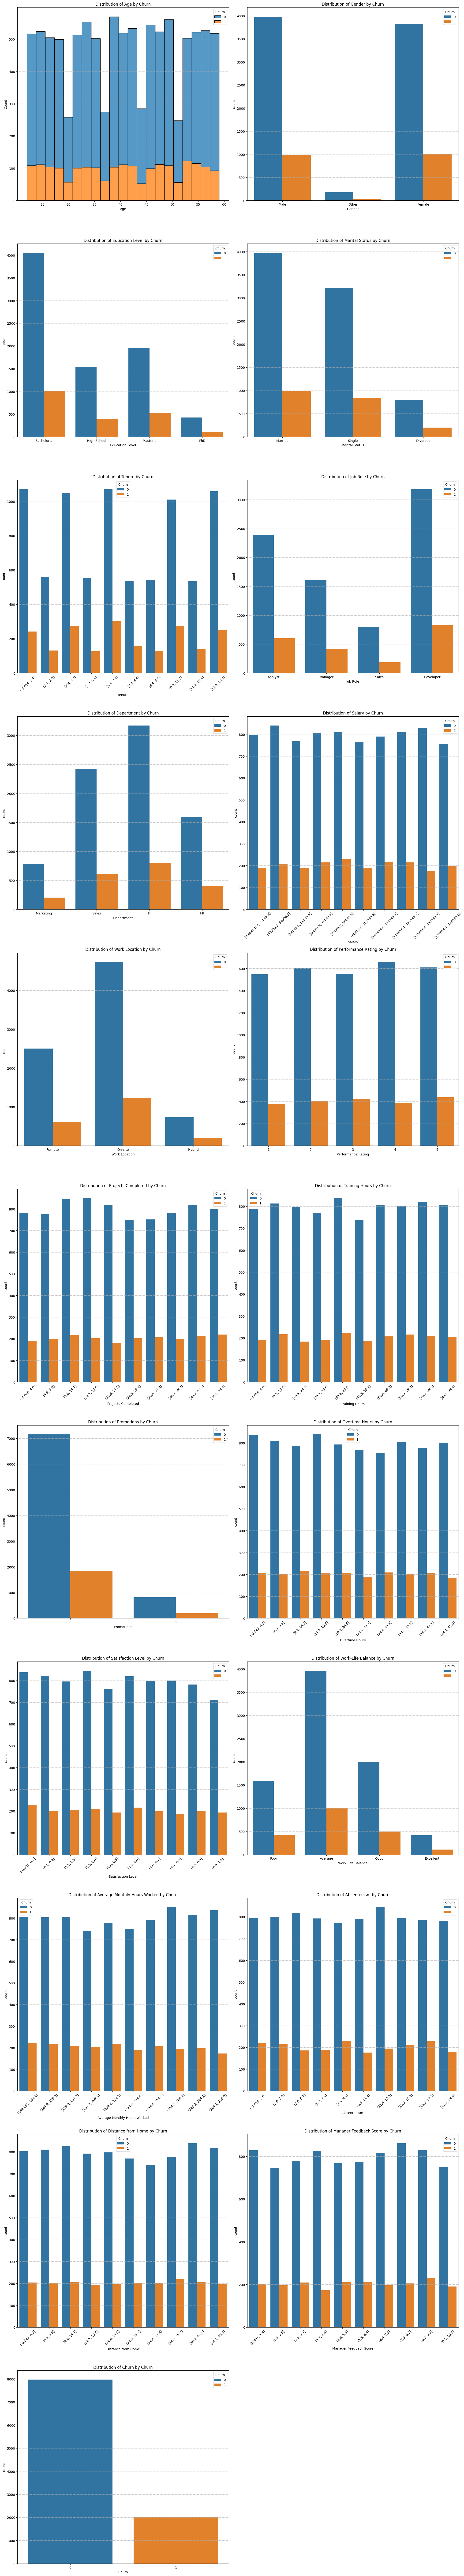

In [145]:
# Creating visualization (each feature by "Churn") organized in 2 columns
n_cols = 2
n_rows = (len(df_employee.columns) + n_cols - 1) // n_cols # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10 * n_rows))
axes = axes.flatten()

# Defining columns to bin and the number of bins
cols_to_bin = ['Manager Feedback Score', 'Distance from Home', 'Salary', 'Tenure', 'Projects Completed', 'Training Hours', 'Overtime Hours', 'Average Monthly Hours Worked', 'Absenteeism', 'Satisfaction Level']
n_bins = 10

for i, col in enumerate(df_employee.columns):
    ax = axes[i]
    if col in cols_to_bin:
        # Bin the numerical feature
        binned_col = pd.cut(df_employee[col], bins=n_bins)
        sns.countplot(data=df_employee, x=binned_col, hue='Churn', ax=ax)
        ax.tick_params(axis='x', rotation=45)
    elif col == 'Age':
        sns.histplot(data=df_employee, x="Age", hue="Churn", multiple="stack", ax=ax)
    else:
        sns.countplot(data=df_employee, x=df_employee[col], hue=df_employee['Churn'], ax=ax)

    ax.set_title(f'Distribution of {col} by Churn')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Finds (distribution of eachf eature, including the target variable):

- Comparing the distribution of each feature with the distribution of the target variable ("Churn"), each feature has a similar distribution.

- The numerical features (with continuous values) visualization shows an approximately uniform distribution, reinforcing the idea that "Churn" is influenced by a complex interplay of multiple features.

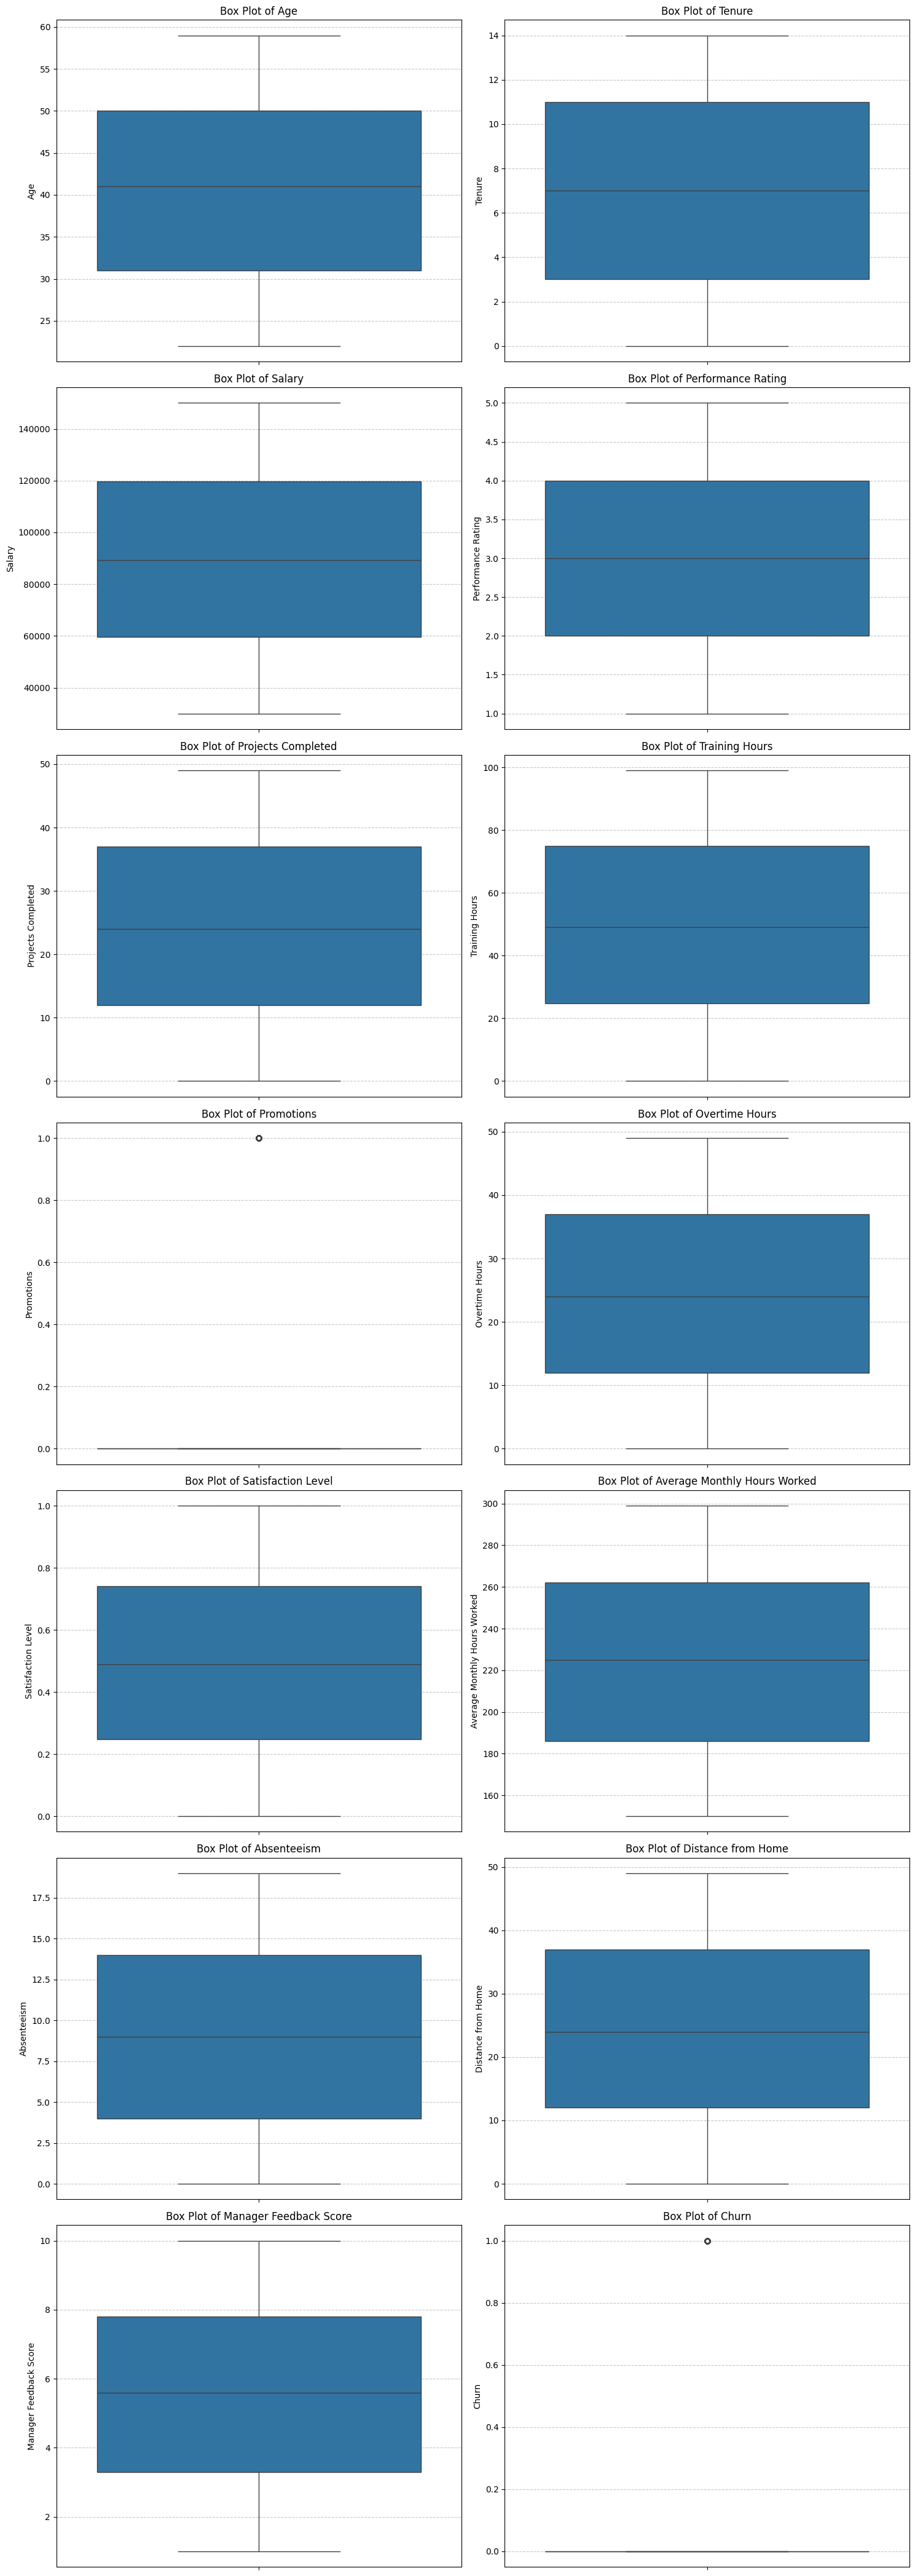

In [146]:
# Creating box plots for numerical features, organized in 2 columns
n_cols = 2
numerical_cols = df_employee.select_dtypes(include=np.number).columns
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(data=df_employee, y=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hiding any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Finds:

- There are **NO OUTLIERS** in this dataset.

In [147]:
# Crosstab between "Education Level", "Job Role", and "Churn"
print("\nCrosstab for Education Level, Job Role, and Churn:")
display(pd.crosstab([df_employee['Education Level'], df_employee['Job Role']], df_employee['Churn'], normalize='index'))


Crosstab for Education Level, Job Role, and Churn:


Churn                             0         1
Education Level Job Role                     
Bachelor's      Analyst    0.803311  0.196689
                Developer  0.798215  0.201785
                Manager    0.805318  0.194682
                Sales      0.802966  0.197034
High School     Analyst    0.801406  0.198594
                Developer  0.783055  0.216945
                Manager    0.784777  0.215223
                Sales      0.849515  0.150485
Master's        Analyst    0.785226  0.214774
                Developer  0.788845  0.211155
                Manager    0.789047  0.210953
                Sales      0.794574  0.205426
PhD             Analyst    0.810056  0.189944
                Developer  0.812500  0.187500
                Manager    0.757895  0.242105
                Sales      0.800000  0.200000

#### Finds (Crosstab [Education Level, Job Role and Churn])
- People that work with *sales* and has high school degree don't have the tendency to leave the job.

- In other hand, people in *management* positions with PhD are more likely to leave the company.

In [148]:
# Crosstab between Work location, Work-life balance and Churn
print("\nCrosstab for Work location, Work-life balance and Churn:")
display(pd.crosstab([df_employee['Work Location'], df_employee['Work-Life Balance']], df_employee['Churn'], normalize='index'))


Crosstab for Work location, Work-life balance and Churn:


Churn                                   0         1
Work Location Work-Life Balance                    
Hybrid        Average            0.777778  0.222222
              Excellent          0.719298  0.280702
              Good               0.819672  0.180328
              Poor               0.765363  0.234637
On-site       Average            0.802419  0.197581
              Excellent          0.801282  0.198718
              Good               0.786207  0.213793
              Poor               0.783497  0.216503
Remote        Average            0.796212  0.203788
              Excellent          0.814103  0.185897
              Good               0.823602  0.176398
              Poor               0.808896  0.191104

#### Finds (Crosstab between Work location, Work-life balance and Churn):

- In "remote jobs", the likely to leave the company doesn't have relation with the work location (people with *good* work-life balance are more likely to **stay** at the company, than *excellent*).

- The "hybrid" system demonstrated "worst" results with people with *excellent* work-life balance.

In [149]:
# Crosstab between Work location, Marital status, Gender and Churn
print("\nCrosstab for Work location, Marital status, Gender and Churn:")
display(pd.crosstab([df_employee['Work Location'], df_employee['Marital Status'], df_employee['Gender']],
                    df_employee['Churn'],
                    normalize='index'))


Crosstab for Work location, Marital status, Gender and Churn:


Churn                                       0         1
Work Location Marital Status Gender                    
Hybrid        Divorced       Female  0.666667  0.333333
                             Male    0.755102  0.244898
                             Other   0.500000  0.500000
              Married        Female  0.785124  0.214876
                             Male    0.783898  0.216102
                             Other   1.000000  0.000000
              Single         Female  0.764045  0.235955
                             Male    0.808989  0.191011
                             Other   1.000000  0.000000
On-site       Divorced       Female  0.832143  0.167857
                             Male    0.782895  0.217105
                             Other   0.750000  0.250000
              Married        Female  0.798301  0.201699
                             Male    0.791807  0.208193
                             Other   0.892857  0.107143
              Single         Female  0.774730  0.225270
                             Male    0.802586  0.197414
                             Other   0.822222  0.177778
Remote        Divorced       Female  0.800000  0.200000
                             Male    0.814286  0.185714
                             Other   1.000000  0.000000
              Married        Female  0.794540  0.205460
                             Male    0.819672  0.180328
                             Other   0.875000  0.125000
              Single         Female  0.791401  0.208599
                             Male    0.809295  0.190705
                             Other   0.884615  0.115385

#### Finds (Crosstab between Work location, Marital status, Gender and Churn):
- Divorced women and people from other gender are highly likely to leave the company (HR must investigate what are causing this behaviour) when work in hybrid (On-site and Remote) system.

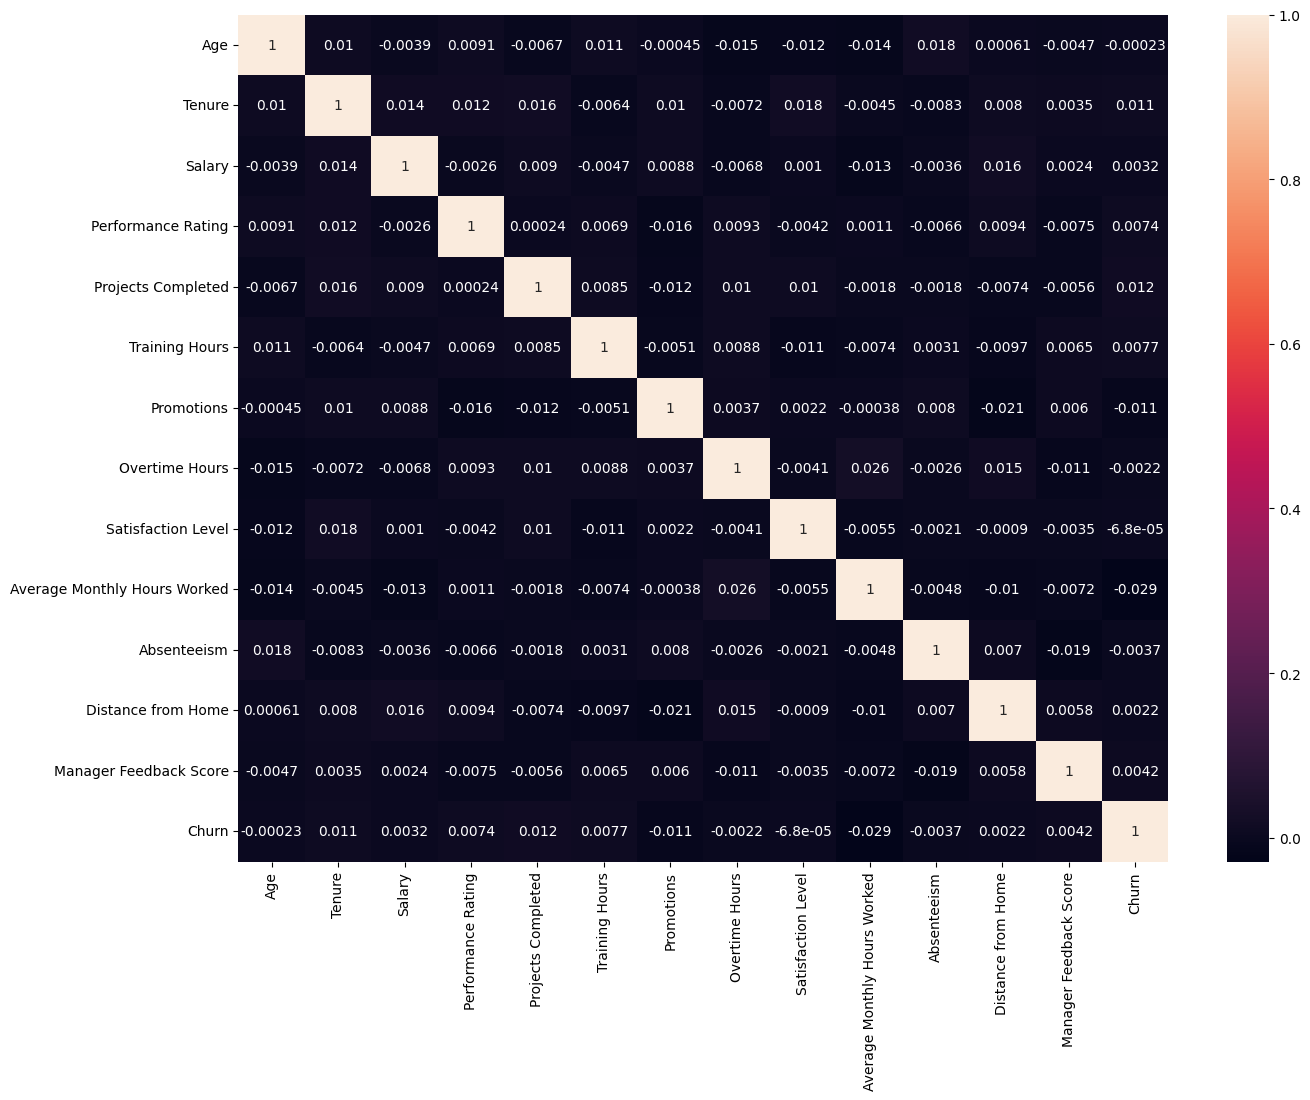

In [150]:
# Selecting only numerical columns
numerical_df = df_employee.select_dtypes(include=np.number)

# Plotting a heatmap to verify the correlation between each feature
plt.figure(figsize=(15, 11))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

#### Finds (heatmap):

- No values has a high positive or negative correlation between the features and the target variable (Churn).

- There is a possibility that the target feature (*Churn*) is influenced by a combination of features.

# 6 - **Data Preprocessing**
- The data doesn't have any missing (NA) or null values
- Some features has categorical values, so it will be necessary to encoding them:

  *   **Label encoding**: for *Job Role* and *Education Level* (since they naturally has a hierarchical order in them).
  *   **One Hot encoding**: for the other categorical features (to avoid add an hierarchical bias in the model, since the features doesn't have an ordinal characteristic)


In [151]:
# Creating new dataframe, applying One-Hot encoding in columns 'Gender', 'Marital Status', 'Department', 'Work Location' and 'Work life balance'
df_encoded = pd.get_dummies(df_employee, columns=['Gender', 'Marital Status', 'Department', 'Work Location', 'Work-Life Balance'])

# Applying label encoding to education level and Job role
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['Education Level'] = le.fit_transform(df_encoded['Education Level'])
df_encoded['Job Role'] = le.fit_transform(df_encoded['Job Role'])

# Selecting boolean columns to change the values to 0 or 1
bool_cols = df_encoded.select_dtypes(include='bool').columns

# Convert boolean columns to integer (0s and 1s)
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           10000 non-null  int64  
 1   Education Level               10000 non-null  int64  
 2   Tenure                        10000 non-null  int64  
 3   Job Role                      10000 non-null  int64  
 4   Salary                        10000 non-null  int64  
 5   Performance Rating            10000 non-null  int64  
 6   Projects Completed            10000 non-null  int64  
 7   Training Hours                10000 non-null  int64  
 8   Promotions                    10000 non-null  int64  
 9   Overtime Hours                10000 non-null  int64  
 10  Satisfaction Level            10000 non-null  float64
 11  Average Monthly Hours Worked  10000 non-null  int64  
 12  Absenteeism                   10000 non-null  int64  
 13  Di

In [152]:
df_encoded.head()

,Age,Education Level,Tenure,Job Role,Salary,Performance Rating,Projects Completed,Training Hours,Promotions,Overtime Hours,...,Department_IT,Department_Marketing,Department_Sales,Work Location_Hybrid,Work Location_On-site,Work Location_Remote,Work-Life Balance_Average,Work-Life Balance_Excellent,Work-Life Balance_Good,Work-Life Balance_Poor
0,50,0,5,0,93422,5,37,35,0,16,...,0,1,0,0,0,1,0,0,0,1
1,36,0,4,2,44589,2,43,1,0,12,...,0,0,1,0,1,0,1,0,0,0
2,29,0,3,3,56768,1,38,41,0,2,...,1,0,0,1,0,0,0,0,0,1
3,42,0,12,0,79009,1,39,33,0,8,...,0,0,1,0,1,0,0,0,1,0
4,40,0,1,3,81982,3,49,30,0,13,...,0,0,0,0,1,0,1,0,0,0


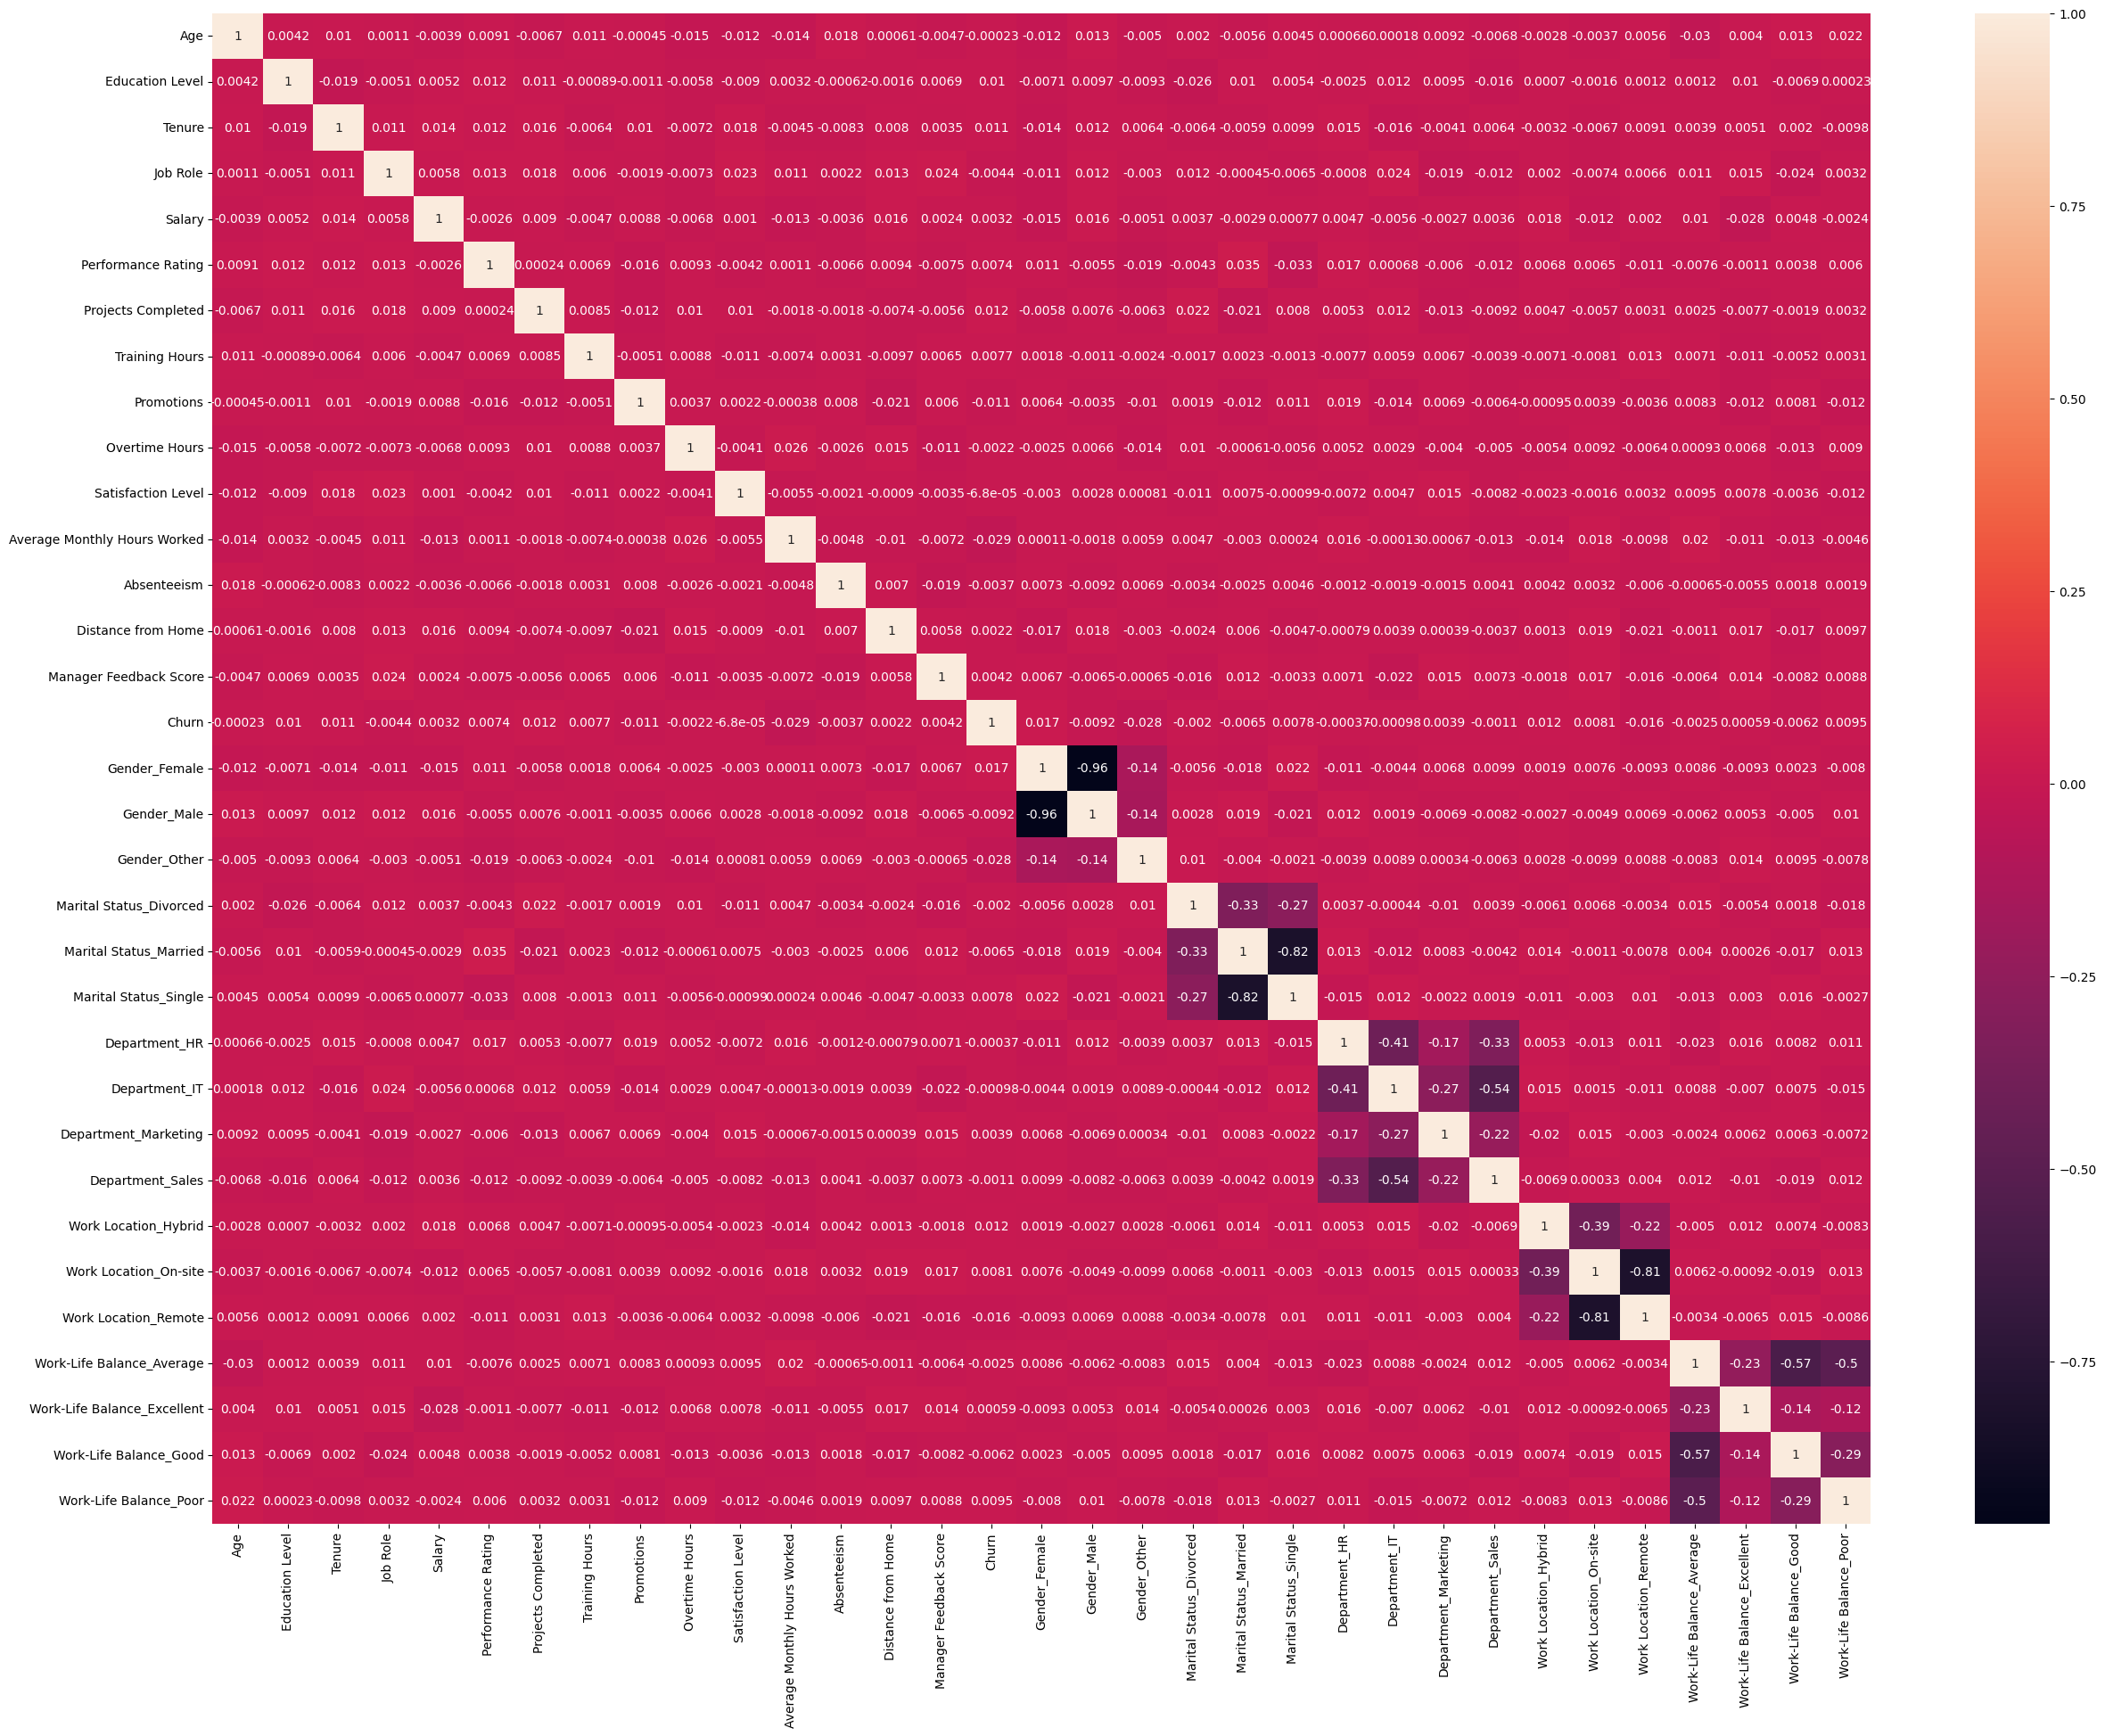

In [153]:
# Heatmap using the encoded dataframe

plt.figure(figsize=(30, 22))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

#### Finds (encoded dataset - *heatmap*)

- Some multicollinearity points appears. But they were expected, since they are features createds based on a same feature (in each group).

# **7.** **Feature Engineering**

- As can be seen above, the features individually don't influence the target variable.
- The idea is now see about the complex relations (more than 1 feature).

In [123]:
# Creating a copy of df_encoded
df_encoded_new_features = df_encoded.copy()

# Creating new features "Overtime_ratio", "Training_intensity" (based on Training
# Hours and Tenure)
df_encoded_new_features['Overtime_Ratio'] = df_encoded_new_features['Overtime Hours'] / df_encoded_new_features['Average Monthly Hours Worked']
df_encoded_new_features['Training_Intensity'] = df_encoded_new_features['Training Hours'] / (df_encoded_new_features['Tenure'] + 0.1) # "+0.1" to avoid division by zero
df_encoded_new_features['Project_Load'] = df_encoded_new_features['Projects Completed'] / (df_encoded_new_features['Tenure'] + 0.1)
df_encoded_new_features['Burnout_Index'] = df_encoded_new_features['Overtime_Ratio'] * (1 - df_encoded_new_features['Satisfaction Level'])

# Calculate mean salary per department from the original DataFrame
department_mean_salaries = df_employee.groupby('Department')['Salary'].mean()

original_departments = df_employee['Department']
df_encoded_new_features['Relative_Salary'] = df_encoded_new_features['Salary'] / original_departments.map(department_mean_salaries)

# Columns to be dropped
original_cols_used = ['Overtime Hours', 'Average Monthly Hours Worked', 'Training Hours', 'Tenure',
                      'Projects Completed', 'Satisfaction Level', 'Salary']

df_encoded_new_features = df_encoded_new_features.drop(columns=original_cols_used, errors='ignore')

# Display the first few rows to see the new features
display(df_encoded_new_features.head())

,Age,Education Level,Job Role,Performance Rating,Promotions,Absenteeism,Distance from Home,Manager Feedback Score,Churn,Gender_Female,...,Work Location_Remote,Work-Life Balance_Average,Work-Life Balance_Excellent,Work-Life Balance_Good,Work-Life Balance_Poor,Overtime_Ratio,Training_Intensity,Project_Load,Burnout_Index,Relative_Salary
0,50,0,0,5,0,14,15,7.9,0,0,...,1,0,0,0,1,0.103226,6.862745,7.254902,0.100129,1.043872
1,36,0,2,2,0,2,8,5.2,0,0,...,0,1,0,0,0,0.074074,0.243902,10.487805,0.045185,0.495648
2,29,0,3,1,0,6,21,6.3,0,0,...,0,0,0,0,1,0.008230,13.225806,12.258065,0.003128,0.634041
3,42,0,0,1,0,11,25,7.4,0,0,...,0,0,0,1,0,0.027491,2.727273,3.223140,0.007423,0.878259
4,40,0,3,3,0,3,1,4.1,0,0,...,0,1,0,0,0,0.047794,27.272727,44.545455,0.022941,0.909912


In [124]:
df_encoded_new_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          10000 non-null  int64  
 1   Education Level              10000 non-null  int64  
 2   Job Role                     10000 non-null  int64  
 3   Performance Rating           10000 non-null  int64  
 4   Promotions                   10000 non-null  int64  
 5   Absenteeism                  10000 non-null  int64  
 6   Distance from Home           10000 non-null  int64  
 7   Manager Feedback Score       10000 non-null  float64
 8   Churn                        10000 non-null  int64  
 9   Gender_Female                10000 non-null  int64  
 10  Gender_Male                  10000 non-null  int64  
 11  Gender_Other                 10000 non-null  int64  
 12  Marital Status_Divorced      10000 non-null  int64  
 13  Marital Status_Ma

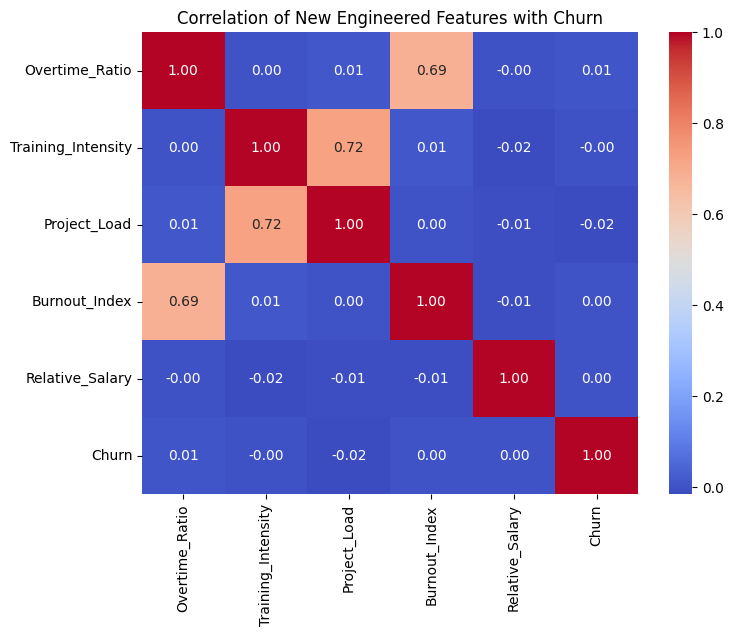

In [125]:
# Columns used to create the new features
original_cols_used = ['Overtime Hours', 'Average Monthly Hours Worked', 'Training Hours', 'Tenure',
                      'Projects Completed', 'Satisfaction Level', 'Salary', 'Department']

# Dropping the columns
df_employee_engineered = df_encoded_new_features.drop(columns=original_cols_used, errors='ignore') # Use errors='ignore' in case some columns were already dropped

# Heatmap with the New features and
newly_engineered_features = ['Overtime_Ratio', 'Training_Intensity', 'Project_Load', 'Burnout_Index', 'Relative_Salary']
features_for_heatmap = newly_engineered_features + ['Churn']

# Calculate the correlation matrix for the new features and Churn
correlation_matrix_new_features = df_employee_engineered[features_for_heatmap].corr()

# Create a heatmap with the new features and Churn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_new_features, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of New Engineered Features with Churn')
plt.show()

#### Finds (*heatmap* - new features)
- No single correlation between the features, except by *Training_Intensity* (ratio between *Training Hours* and "*Tenure* + 0.1") and *Project_Load* (*Projects Completed* divided by "*Tenure* + 0.1").

# **8.** Experiment Design

- The goal of this experiment is to build and evaluate machine learning models that can predict employee churn with high accuracy and interpretability. We aim to compare 2 algorithms (Logistic Regression and Random Forest) and identify the most reliable approach for early attrition detection.

- The dataset is divided into 80% training and 20% testing using stratified sampling to maintain the churn rate distribution. To ensure robust performance estimation, 5-fold cross-validation is applied on the training set. Class imbalance is mitigated using SMOTE oversampling.

- The models used are Logistic Regression (for interpretability and comparison) and Random Forest (for non-linear interactions and robustness).

- For metric, since the company aims to reduce costs with employee leaving the company (training costs, delayed projects, etc), the chosen was *RECALL*.

- RECALL penalizes the model for the FALSE NEGATIVES (People which the model indicates that will STAY in the company but they LEAVE), it's suited for the case.

In [ ]:
from sklearn.model_selection import train_test_split

In [161]:
# Prepare the data with engineered features
X_engineered = df_employee_engineered.drop('Churn', axis=1)
y_engineered = df_employee_engineered['Churn']

# Split the engineered data into training and testing sets
X_train_engineered, X_test_engineered, y_train_engineered, y_test_engineered = train_test_split(
    X_engineered, y_engineered, test_size=0.2, random_state=42, stratify=y_engineered
)

In [162]:
print("Shape of X_train_engineered:", X_train_engineered.shape)
print("Shape of X_test_engineered:", X_test_engineered.shape)
print("Shape of y_train_engineered:", y_train_engineered.shape)
print("Shape of y_test_engineered:", y_test_engineered.shape)

Shape of X_train_engineered: (8000, 30)
Shape of X_test_engineered: (2000, 30)
Shape of y_train_engineered: (8000,)
Shape of y_test_engineered: (2000,)


In [163]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# Apply SMOTE to the engineered training data
print("Original engineered training dataset shape %s" % Counter(y_train_engineered))
sm = SMOTE(random_state=42)
X_train_engineered_res, y_train_engineered_res = sm.fit_resample(X_train_engineered, y_train_engineered)
print("Resampled engineered training dataset shape %s" % Counter(y_train_engineered_res))

Original engineered training dataset shape Counter({0: 6378, 1: 1622})
Resampled engineered training dataset shape Counter({0: 6378, 1: 6378})


- SMOTE (Synthetic Minority Over-sampling Technique) is used creating synthetics exmples of the minority class (in this case, people who leave the company are the minority - around 20% of the dataset).

- The idea is to balance the class 1 (people who leave th company) with class 0 (people who stay).

- To maintain the reproducibility, the random_state is set to 42.

In [173]:
# Defining a parameter grid
param_grid_lr = {
    'C': [0.1, 0.1, 1, 10, 100, 200],
    'penalty': ['l1', 'l2']
}

- In this case, it will be used the GridSearch, to help to find the best combination ofhyperparameters.

- The hyperparameters are:

  1.   **C**: Inverse of regularization strength. It's used to avoid *overfitting*, adding an extra term to the error function (penalizing large weights).
  2.   **penalty**: It's the way to encourage to the model to find simpler patterns that are more likely to generalize well to new data. THe three used are:
        *   **L1**: penalty term proportional to the absolute value of the coefficients.
        *   **L2**: penalty term proportional to the square of the coefficients
        *   **elasticnet**: both L1 and L2 penalty terms are added.







In [181]:
#Creating logistic model regression
lr_model_engineered = LogisticRegression(solver='liblinear', class_weight='balanced')

- The logistic regression model is set.

- The hyper parameters are:
    1. **'saga'**: algorithm from a Python library used to optimize the logistic regression model.
    2. **"balanced"**: complementary to SMOTE (which acts in the Data), the class_weight "balanced" acts in the model assign different weights to the samples in training data.

In [182]:
# Set up Grid Search with Cross-Validation, optimizing for Recall
grid_search_lr_engineered = GridSearchCV(estimator=lr_model_engineered, param_grid=param_grid_lr, cv=5, scoring='recall', n_jobs=-1)

- The GridSearch is an exhaustive search on the parameters informed in *param_grid_lr*.
- The *cross-validation* of 5 is the number of folds the data will be splitted and in an iteration of 5 times, each time 4 folds will be used in training and 1 will be used in test.

- The *Recall* will determine which are the best hyperparameters combination. The reason was already explained.

- **n_jobs** specifies how many CPU cores to use for the computation. *-1* indicates the model will use all cores.

In [183]:
# Fitting the Grid Search to the resampled engineered training data
grid_search_lr_engineered.fit(X_train_engineered_res, y_train_engineered_res)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.1, 1, 10, 100, 200],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [185]:
print("Best parameters for Logistic Regression: ", grid_search_lr_engineered.best_params_)
print("Best cross-validation recall for Logistic Regression: ", grid_search_lr_engineered.best_score_)

Best parameters for Logistic Regression:  {'C': 0.1, 'penalty': 'l1'}
Best cross-validation recall for Logistic Regression:  0.739767287479255


- The model has a recall of 0.74 (74%).

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [187]:
# Define a parameter grid for Grid Search for Random Forest (can be expanded)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Creating a Random Forest model
rf_model_engineered = RandomForestClassifier(random_state=42, class_weight='balanced')

# Setting up Grid Search with Cross-Validation, optimizing for Recall
grid_search_rf_engineered = GridSearchCV(estimator=rf_model_engineered, param_grid=param_grid_rf, cv=5, scoring='recall', n_jobs=-1)

# Fitting the Grid Search to the resampled engineered training data
grid_search_rf_engineered.fit(X_train_engineered_res, y_train_engineered_res)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='recall')

- Basically, the random forest is a combination of multiple independent decision trees (or *estimators*, in this case 100 or 200).

- For each decision tree being build, the model randomly select a subset of available features.

In [189]:
# Print the best parameters and best score
print("Best parameters for Random Forest: ", grid_search_rf_engineered.best_params_)
print("Best cross-validation recall for Random Forest: ", grid_search_rf_engineered.best_score_)

Best parameters for Random Forest:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation recall for Random Forest:  0.7449415452701457


- The results were similar with the *Logistic Regression*, with a minimal difference.


## 9. Recommendations
The HR team can develop a strategy to hold people in management positions, with PhD (e.g. improve in the benefits, since they are most experienced and with a stressful activities)

The "hybrid" system demonstrated "worst" results with people with *excellent* work-life balance (possibility to change them to remote or on-site), **so** a probably solution is analyze each one of this employees with *excellent* work-life balance and change them to *remote* or *on-site*, depending of their performance.

Divorced women and people from other gender are highly likely to leave the company (HR must investigate what are causing this behaviour) when work in hybrid (On-site and Remote) system.